## Análise de Variância

### Análise Geral

In [65]:
tab <- read.csv(file = './DoE/DoE - Results v3.csv', sep = ";", dec = ",")
head(tab)

,OrdemPad,OrdemEns,N,cv,rho,p,algorithm,Cost,SL,Smax,Smin
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,470,1,5,0.25,0.7,0.00,NM,152993.6,89.88,"[397.2654856684437, 575.7171241719723, 535.8452989787397, 1038.5008081180397, 660.4119425659904]","[221.6896732987889, 463.7362156871882, 441.47401004335796, 47.83355313504789, 646.3943394281191]"
2,395,2,20,0.25,0.9,0.15,GA,185110.0,98.29,"[16.21, 145.28, 369.86, 666.66, 717.44, 478.14, 437.37, 544.38, 130.51, 168.8, 888.57, 69.21, 813.2, 190.98, 230.71, 247.69, 122.64, 633.93, 404.05, 709.47]","[14.685170030467107, 86.30906598073835, 314.33274379780886, 478.26379994726136, 480.3149864483198, 293.67961213912116, 228.7044330140769, 228.78750684904523, 56.67389116678034, 48.08328804889847, 143.61124663540184, 35.05858675594362, 584.4070500081546, 167.0230084753182, 226.2375917425487, 237.48690484029038, 58.80863930379241, 113.50096176088212, 286.03218661023595, 592.5219584148821]"
3,376,3,20,0.25,0.8,0.00,ACO,174332.0,98.12,"[790.0, 670.0, 90.0, 570.0, 160.0, 345.0, 190.0, 460.0, 950.0, 860.0, 280.0, 70.0, 405.0, 775.0, 85.0, 295.0, 40.0, 455.0, 735.0, 445.0]","[255.0, 285.0, 5.0, 470.0, 135.0, 190.0, 75.0, 355.0, 290.0, 515.0, 60.0, 35.0, 20.0, 115.0, 50.0, 35.0, 20.0, 110.0, 390.0, 15.0]"
4,312,4,10,0.50,0.8,0.15,ACO,124730.3,98.07,"[455.0, 230.0, 855.0, 465.0, 330.0, 115.0, 285.0, 930.0, 895.0, 175.0]","[240.0, 65.0, 735.0, 330.0, 285.0, 30.0, 240.0, 855.0, 575.0, 15.0]"
5,968,5,10,0.50,0.9,0.05,ACO,108410.7,98.80,"[425.0, 850.0, 480.0, 630.0, 310.0, 175.0, 410.0, 285.0, 885.0, 170.0]","[240.0, 330.0, 375.0, 395.0, 130.0, 170.0, 90.0, 30.0, 685.0, 105.0]"
6,64,6,20,0.25,0.9,0.00,ACO,170090.5,99.99,"[225.0, 445.0, 485.0, 350.0, 340.0, 380.0, 245.0, 580.0, 715.0, 715.0, 770.0, 120.0, 335.0, 115.0, 295.0, 625.0, 735.0, 335.0, 350.0, 575.0]","[225.0, 120.0, 355.0, 55.0, 205.0, 40.0, 90.0, 395.0, 535.0, 340.0, 180.0, 110.0, 235.0, 40.0, 120.0, 295.0, 480.0, 110.0, 125.0, 330.0]"


In [66]:
tail(tab)

,OrdemPad,OrdemEns,N,cv,rho,p,algorithm,Cost,SL,Smax,Smin
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
967,150,967,5,0.25,0.7,0.05,NM,199381.97,85.44,"[90.36434852749218, 597.5802369758671, 811.3272745618066, 966.7865687860906, 381.70286389847354]","[67.93977319967226, 291.7344780826146, 332.720117825315, 834.300355992303, 249.41708770267212]"
968,10,968,20,0.10,0.7,0.15,NM,144925.74,99.92,"[502.9426776991907, 413.00830686708946, 632.8247210886319, 590.6038949437816, 805.5158981179712, 474.4921255204336, 418.5375334732149, 439.5381612893717, 359.3633348081436, 458.4997934148432, 431.22170284748637, 557.9674810940007, 646.1687102830108, 225.47437448638183, 348.27810957725774, 496.5189879500353, 341.9845270271894, 309.47840735736696, 514.8664015334533, 565.090038115657]","[235.6929195759084, 248.3576008484995, 391.3615956308341, 363.57411036507176, 615.2225587369546, 270.4461229370087, 191.02121955139725, 163.06805759633517, 273.41411738250434, 214.3113544413185, 264.93536690986895, 251.10031741707792, 233.47540069422294, 70.42800101914622, 141.49779708128585, 180.26738828994164, 126.09575398228839, 218.91782177225127, 174.33761504762208, 302.38125161631973]"
969,524,969,5,0.50,0.8,0.05,ACO,93635.97,97.62,"[360.0, 390.0, 455.0, 195.0, 705.0]","[355.0, 380.0, 445.0, 145.0, 600.0]"
970,732,970,20,0.50,0.7,0.15,ACO,187280.09,98.97,"[525.0, 395.0, 255.0, 850.0, 110.0, 220.0, 330.0, 855.0, 655.0, 800.0, 100.0, 990.0, 400.0, 175.0, 835.0, 425.0, 485.0, 100.0, 405.0, 130.0]","[270.0, 245.0, 165.0, 225.0, 70.0, 205.0, 75.0, 225.0, 515.0, 470.0, 100.0, 940.0, 345.0, 45.0, 435.0, 405.0, 190.0, 90.0, 215.0, 0.0]"
971,533,971,5,0.50,0.9,0.05,RD,75840.23,99.94,"[795.7622507107035, 472.98306458537655, 643.947044893723, 737.3788675626281, 346.3099298864836]","[554.6826976836765, 413.46864332318927, 615.903005559218, 415.85554780997194, 161.91969926317316]"
972,972,972,10,0.50,0.9,0.15,ACO,113845.54,98.12,"[465.0, 550.0, 910.0, 270.0, 625.0, 525.0, 430.0, 175.0, 115.0, 840.0]","[245.0, 460.0, 400.0, 130.0, 270.0, 425.0, 385.0, 10.0, 70.0, 780.0]"


In [67]:
TIC<-tab$Cost
alg<-factor(tab$algorithm)
n<-factor(tab$N)
cv<-factor(tab$cv)
rho<-factor(tab$rho)
p<-factor(tab$p)

In [68]:
av<-aov(TIC~n*cv*rho*p*alg)
summary(av)

                Df    Sum Sq   Mean Sq  F value   Pr(>F)    
n                2 5.437e+11 2.718e+11 1319.172  < 2e-16 ***
cv               2 5.239e+09 2.620e+09   12.713 3.84e-06 ***
rho              2 2.487e+11 1.243e+11  603.416  < 2e-16 ***
p                2 1.868e+09 9.342e+08    4.533 0.011087 *  
alg              3 4.392e+10 1.464e+10   71.049  < 2e-16 ***
n:cv             4 2.375e+10 5.937e+09   28.810  < 2e-16 ***
n:rho            4 2.952e+11 7.379e+10  358.100  < 2e-16 ***
cv:rho           4 1.135e+10 2.836e+09   13.764 8.84e-11 ***
n:p              4 4.525e+09 1.131e+09    5.489 0.000238 ***
cv:p             4 7.412e+08 1.853e+08    0.899 0.463959    
rho:p            4 1.102e+09 2.754e+08    1.337 0.254843    
n:alg            6 1.244e+10 2.073e+09   10.062 1.20e-10 ***
cv:alg           6 2.548e+09 4.247e+08    2.061 0.055865 .  
rho:alg          6 3.590e+09 5.983e+08    2.904 0.008426 ** 
p:alg            6 1.192e+09 1.986e+08    0.964 0.448785    
n:cv:rho         8 1.339

In [69]:
av<-aov(TIC~n+cv+rho+p+alg+n:cv+n:rho+n:p+n:alg+cv:rho+cv:p+cv:alg+rho:p+rho:alg+p:alg)
summary(av)

             Df    Sum Sq   Mean Sq  F value   Pr(>F)    
n             2 5.437e+11 2.718e+11 1313.737  < 2e-16 ***
cv            2 5.239e+09 2.620e+09   12.660 3.77e-06 ***
rho           2 2.487e+11 1.243e+11  600.930  < 2e-16 ***
p             2 1.868e+09 9.342e+08    4.515 0.011193 *  
alg           3 4.392e+10 1.464e+10   70.756  < 2e-16 ***
n:cv          4 2.375e+10 5.937e+09   28.692  < 2e-16 ***
n:rho         4 2.952e+11 7.379e+10  356.625  < 2e-16 ***
n:p           4 4.525e+09 1.131e+09    5.467 0.000237 ***
n:alg         6 1.244e+10 2.073e+09   10.020 9.74e-11 ***
cv:rho        4 1.135e+10 2.836e+09   13.708 7.36e-11 ***
cv:p          4 7.412e+08 1.853e+08    0.896 0.465974    
cv:alg        6 2.548e+09 4.247e+08    2.052 0.056430 .  
rho:p         4 1.102e+09 2.754e+08    1.331 0.256512    
rho:alg       6 3.590e+09 5.983e+08    2.892 0.008493 ** 
p:alg         6 1.192e+09 1.986e+08    0.960 0.451279    
Residuals   912 1.887e+11 2.069e+08                      
---
Signif. co

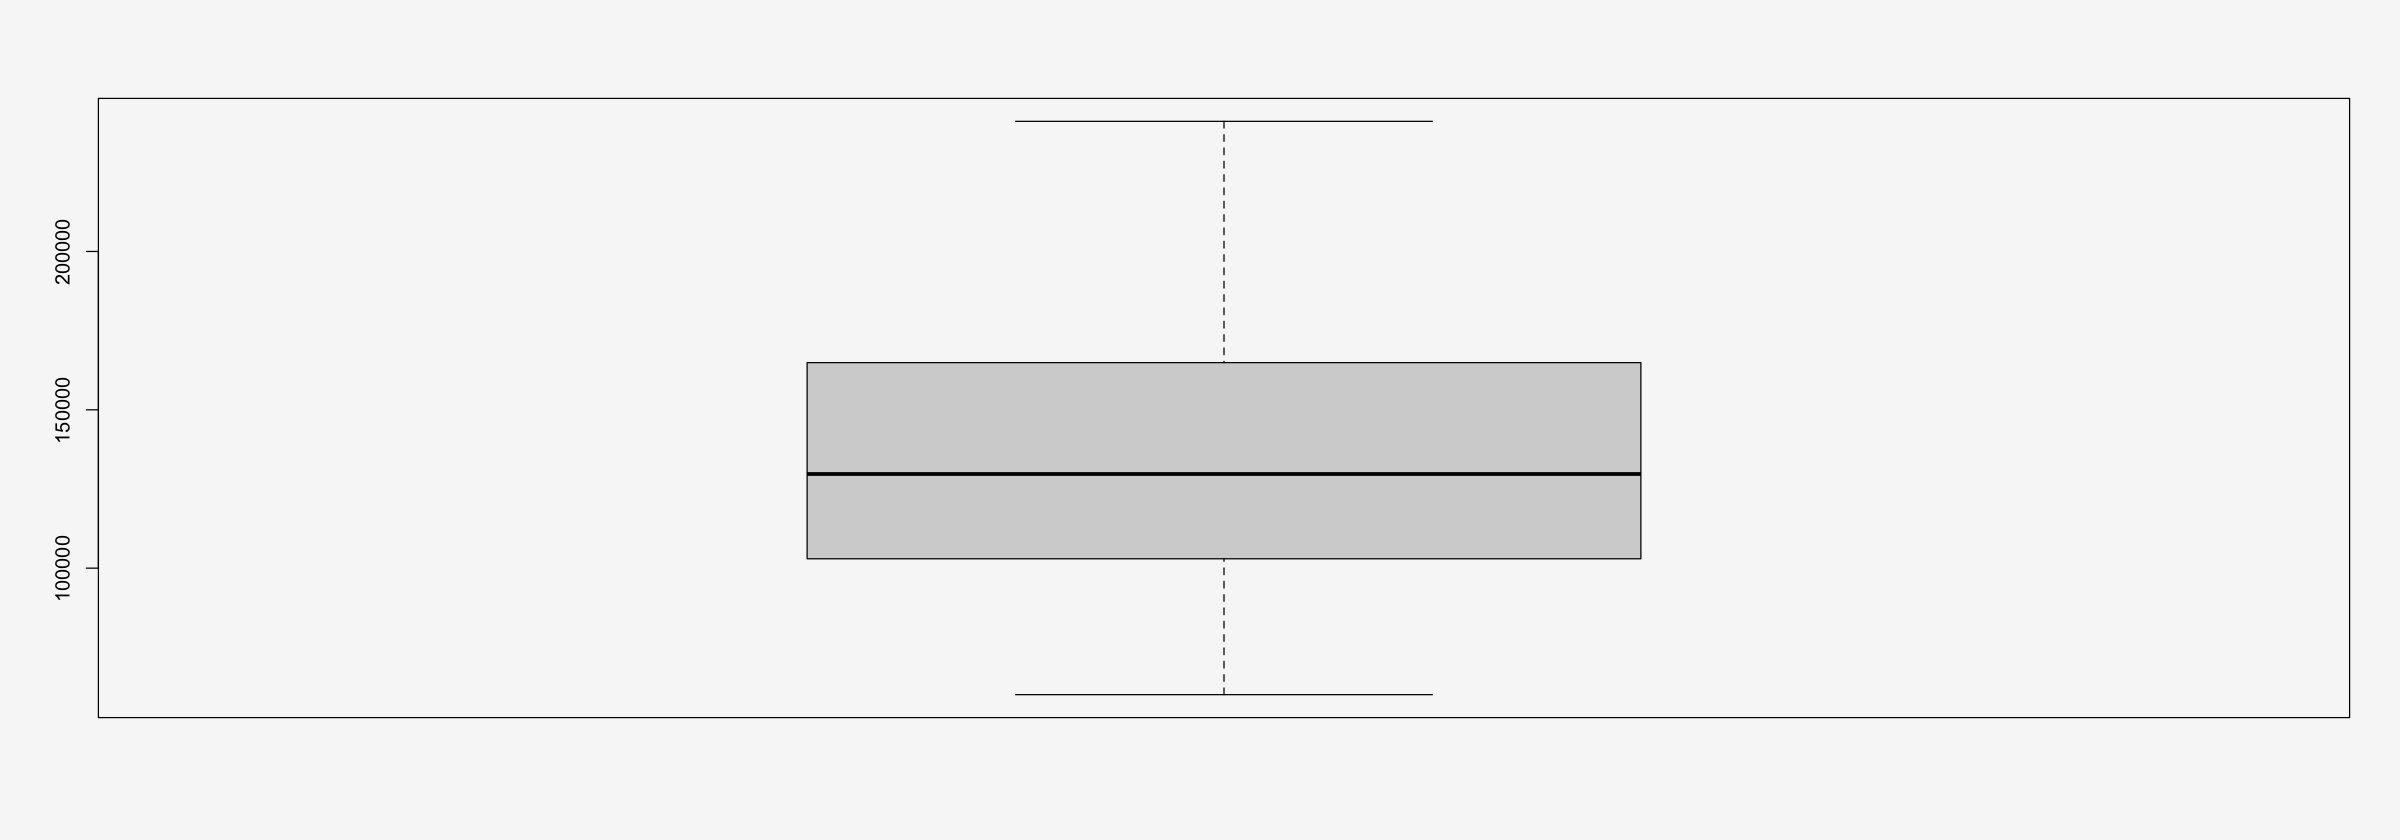

In [70]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC)


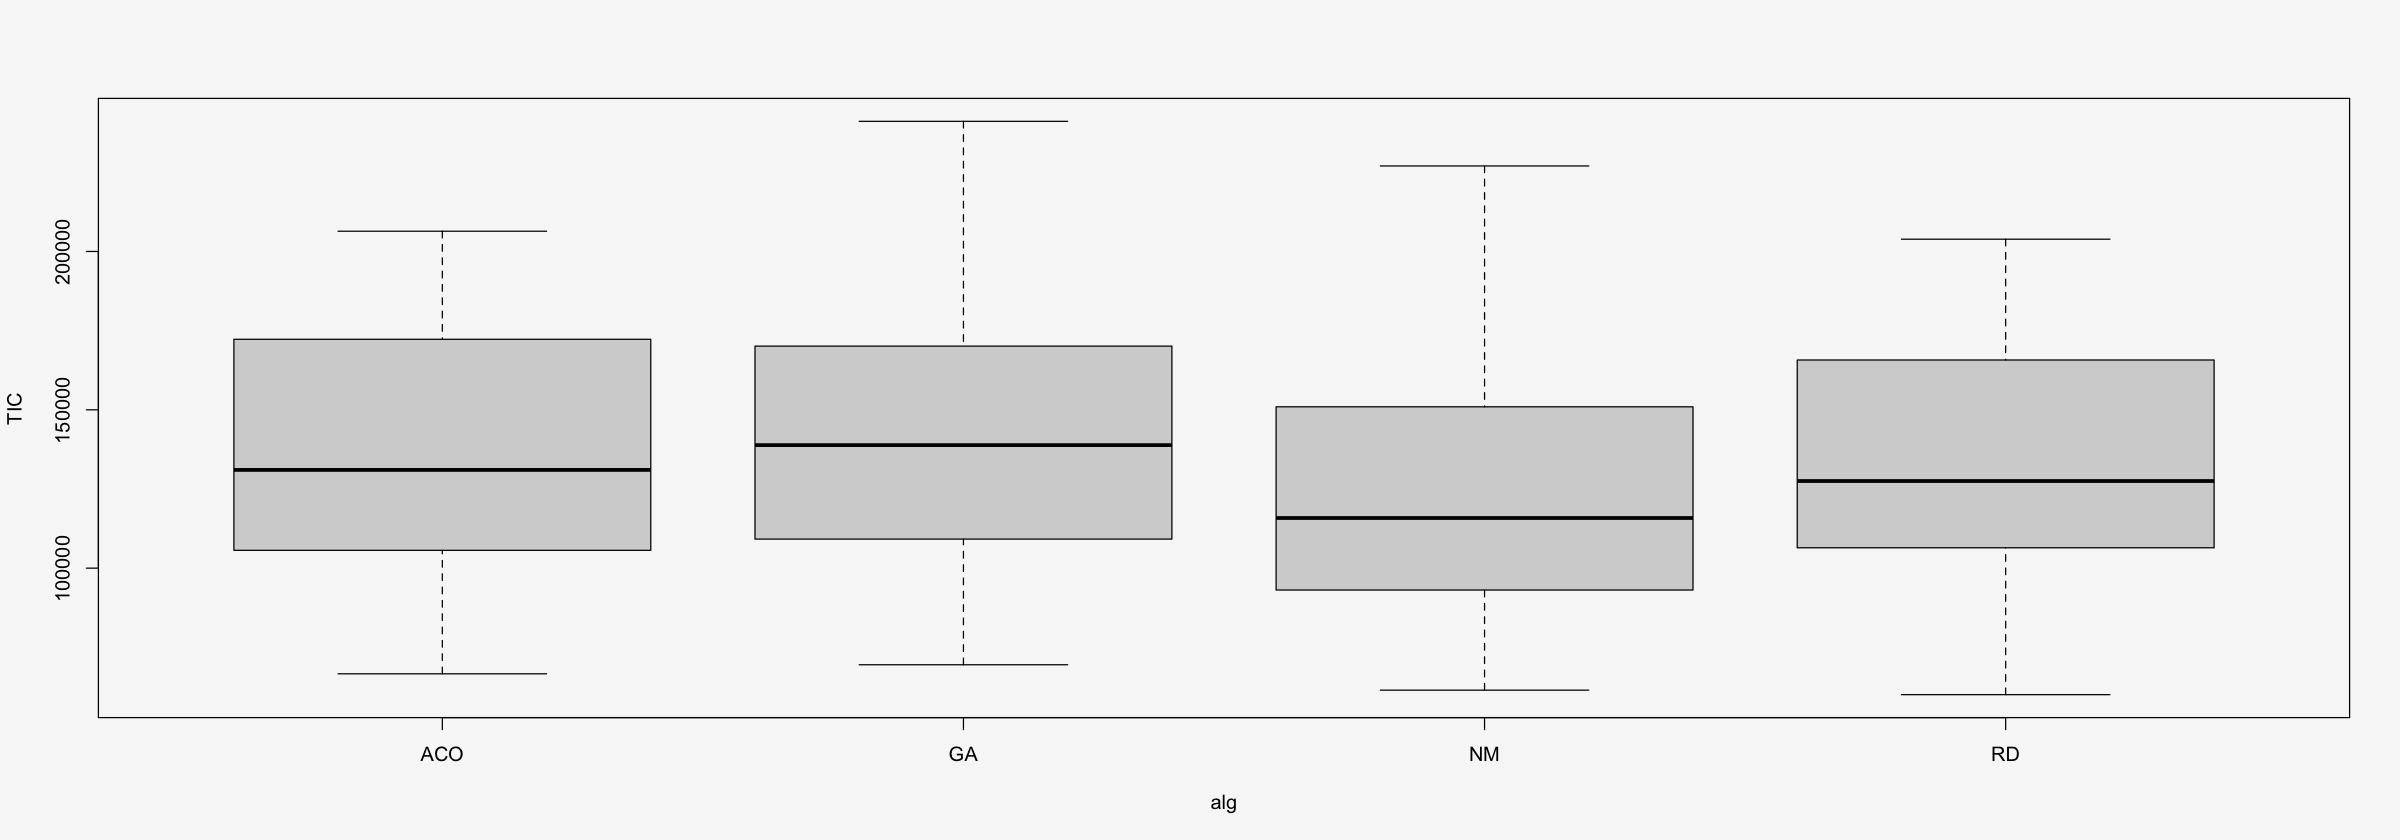

In [71]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~alg)

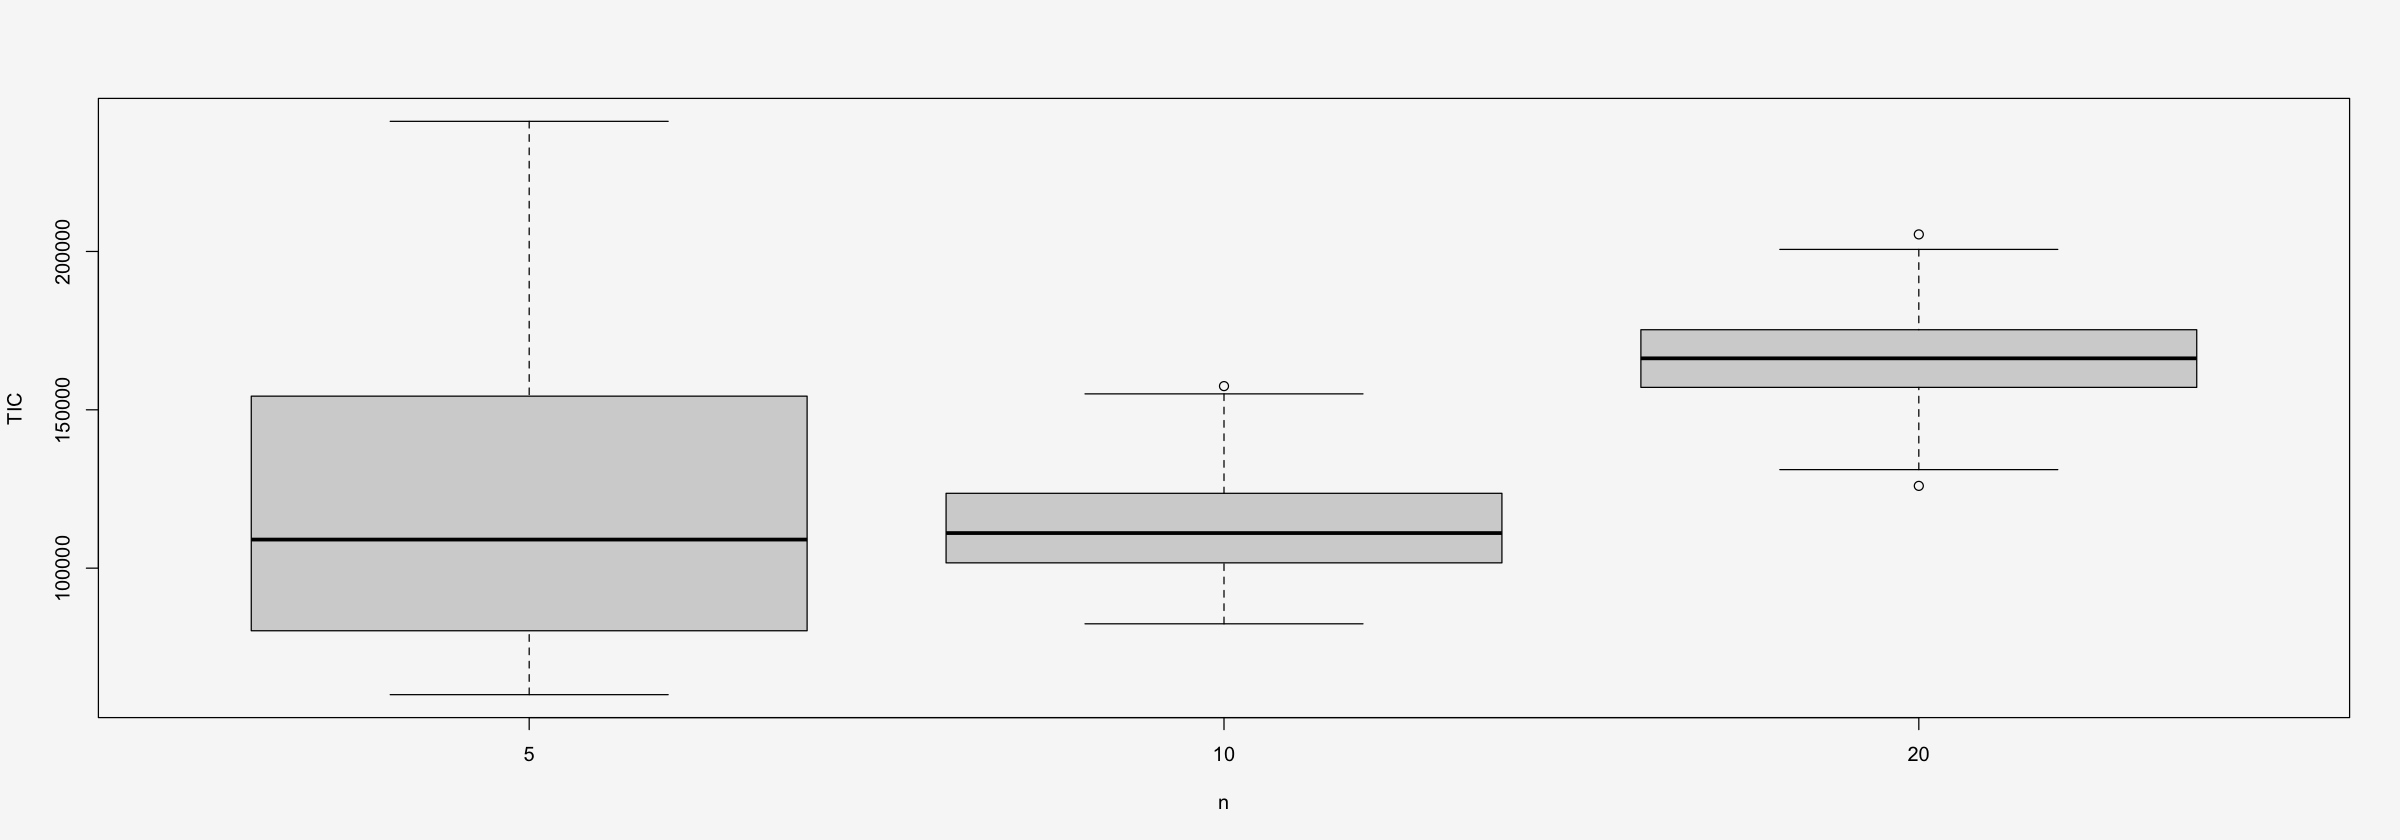

In [72]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~n)

In [73]:
# Light gray background color
par(bg = "#f7f7f7")
options(repr.plot.width=10)

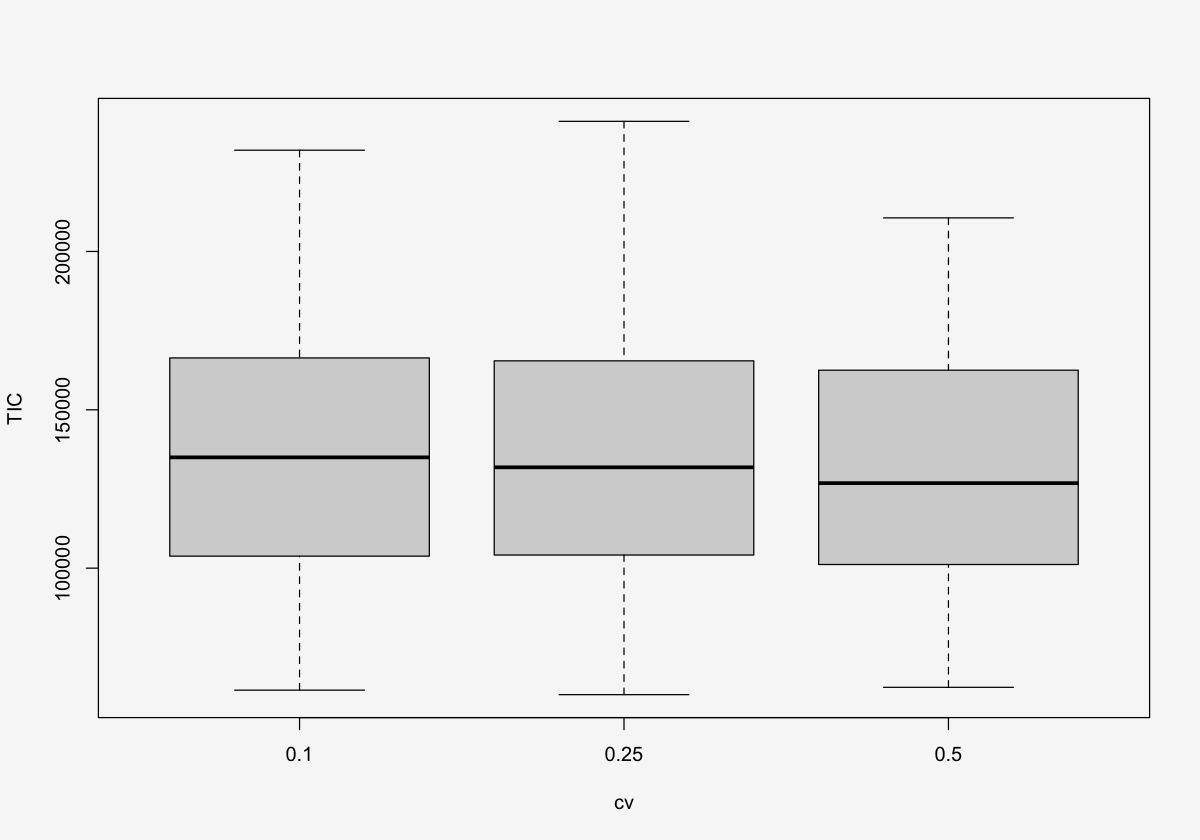

In [74]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv)

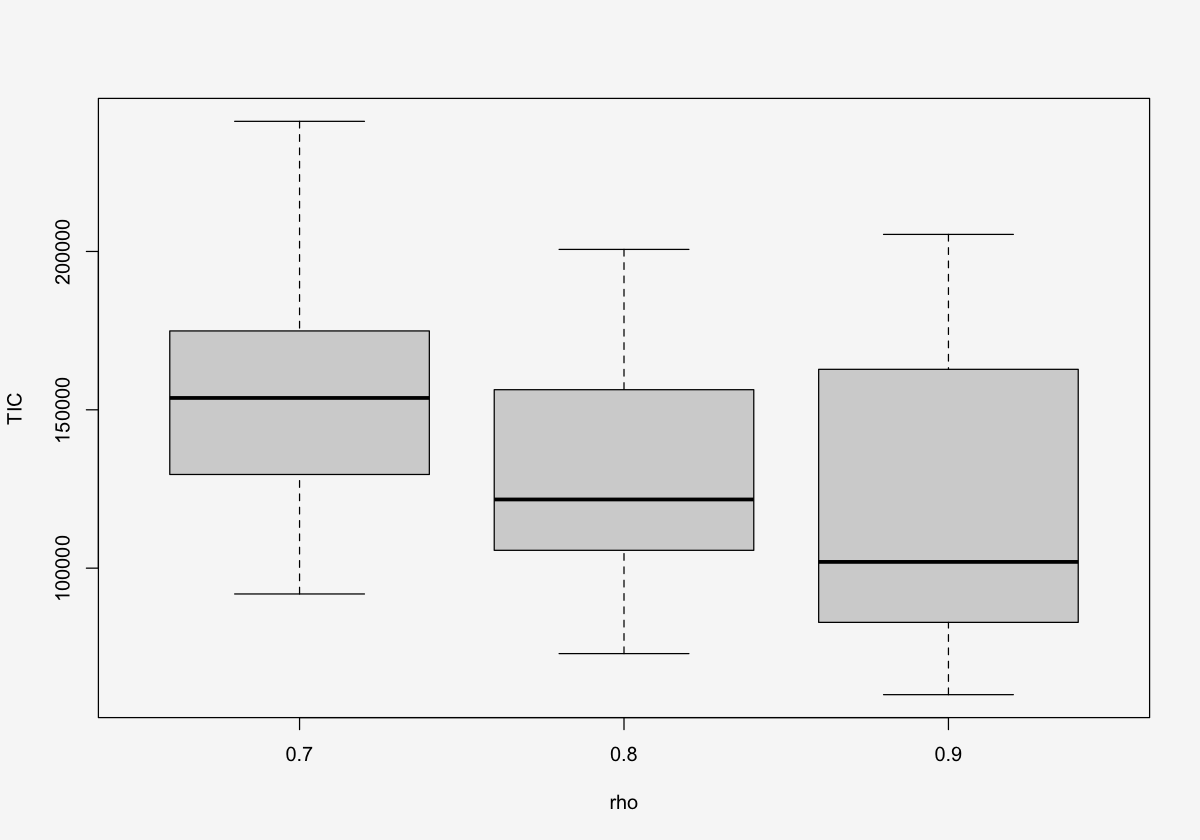

In [75]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~rho)

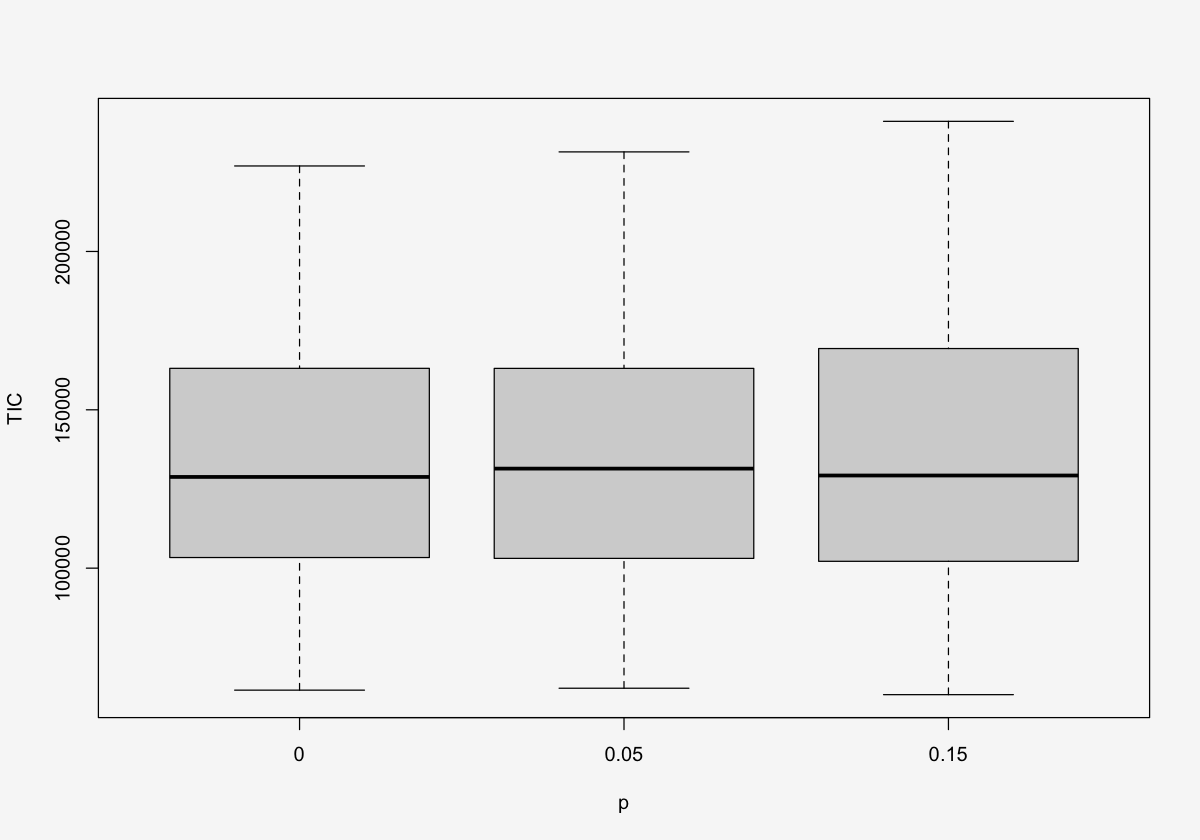

In [76]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~p)

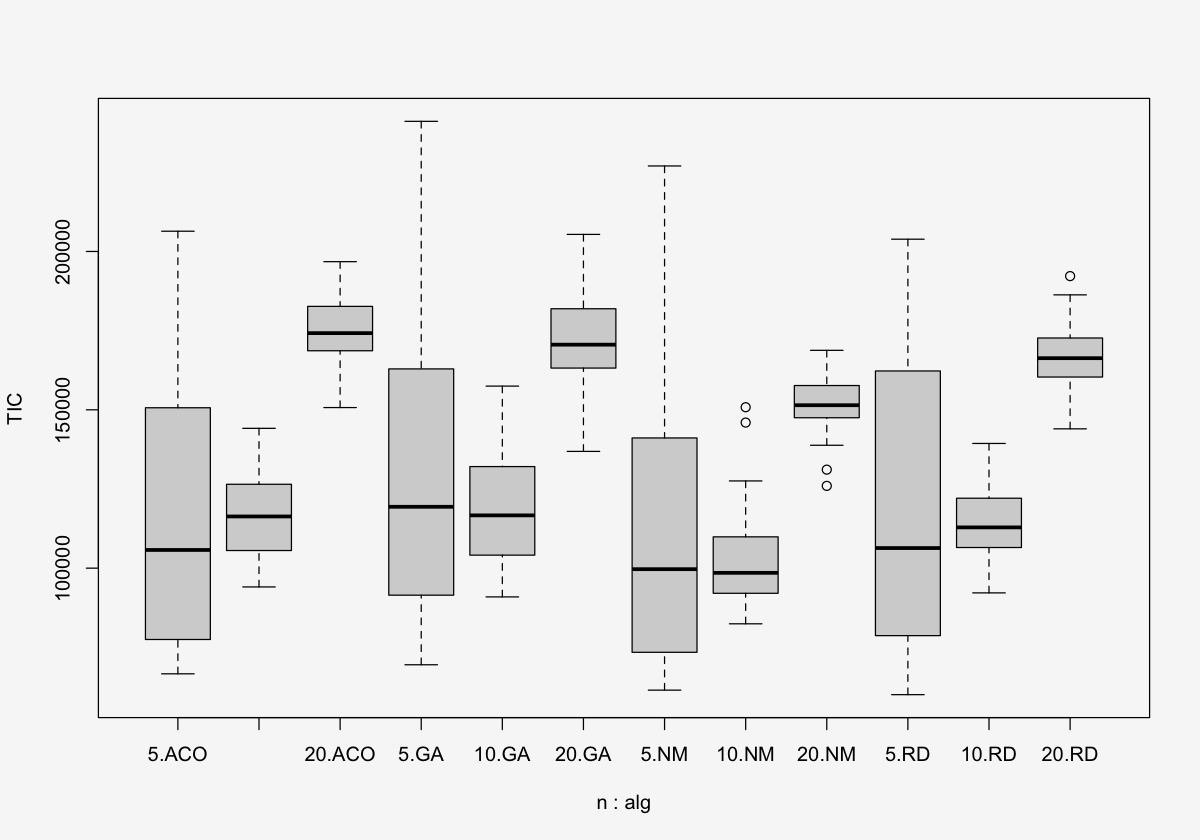

In [77]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~n*alg)

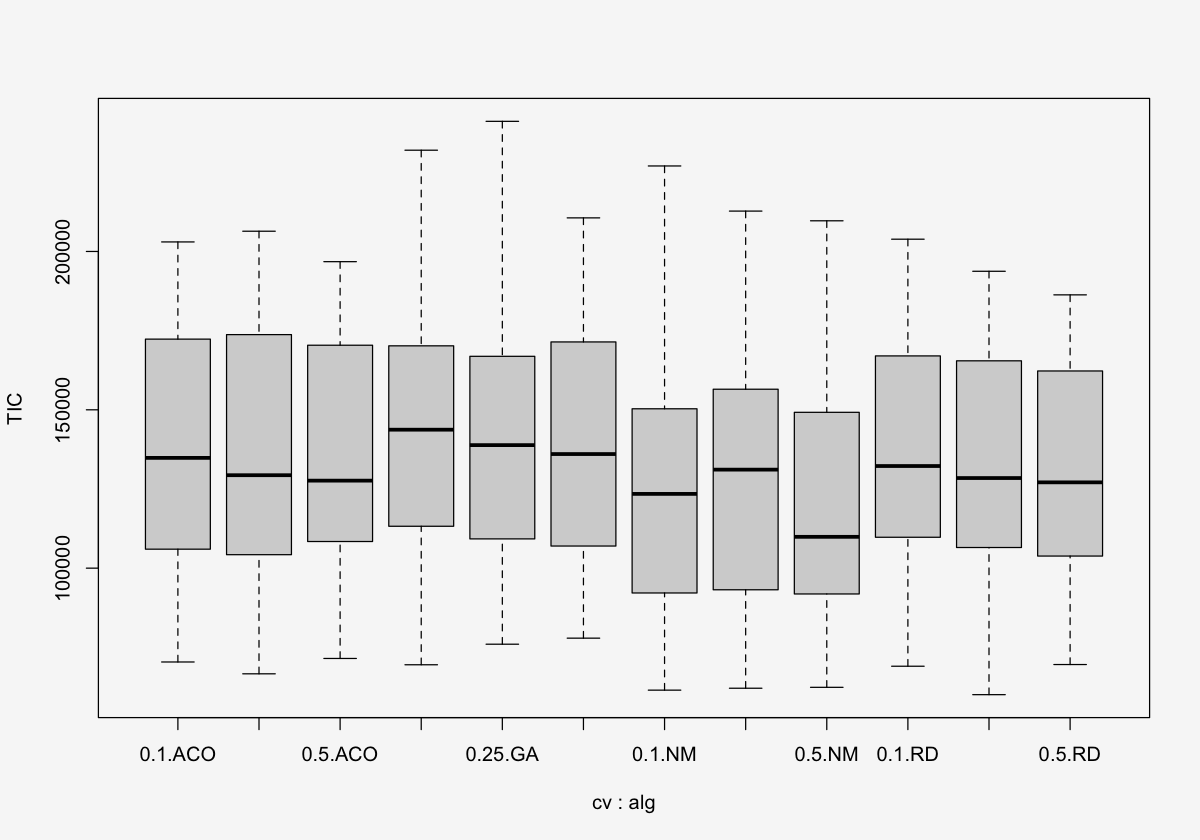

In [78]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv*alg)

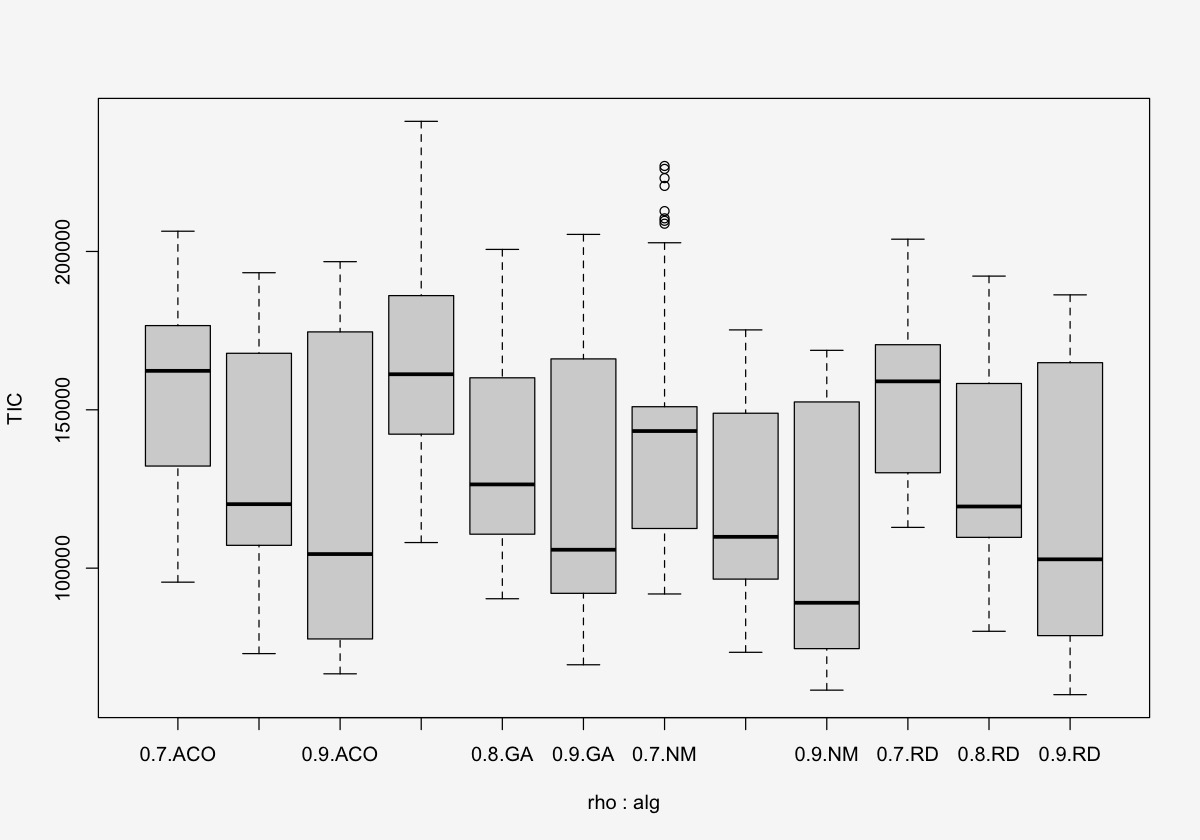

In [79]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~rho*alg)

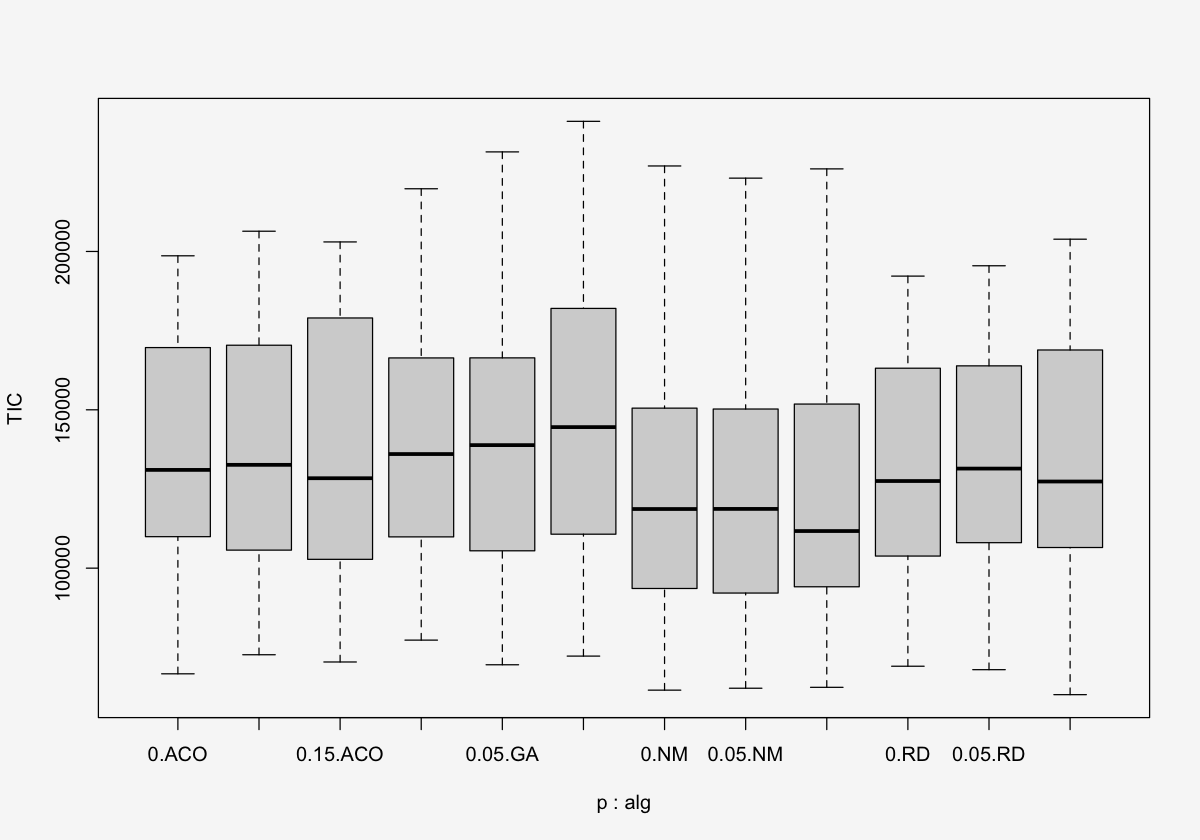

In [80]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~p*alg)

In [81]:
options(repr.plot.width=20)

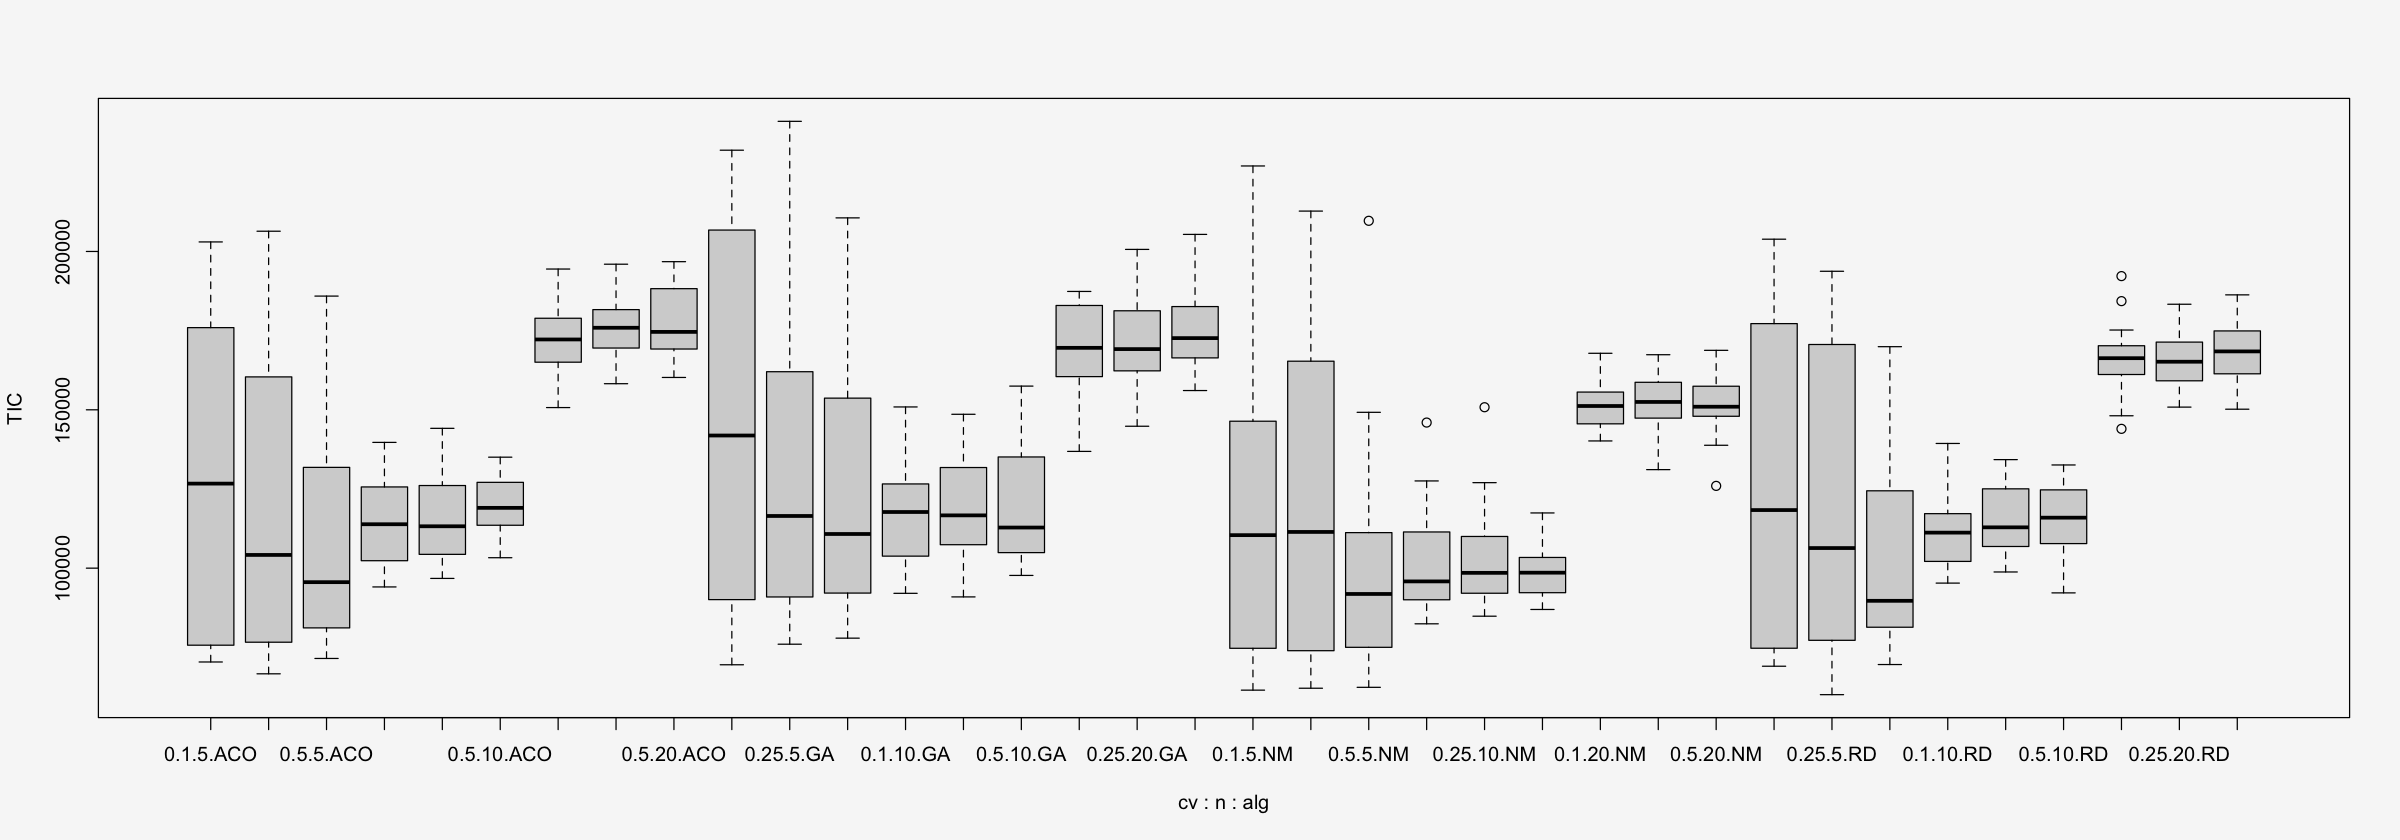

In [82]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv*n*alg)

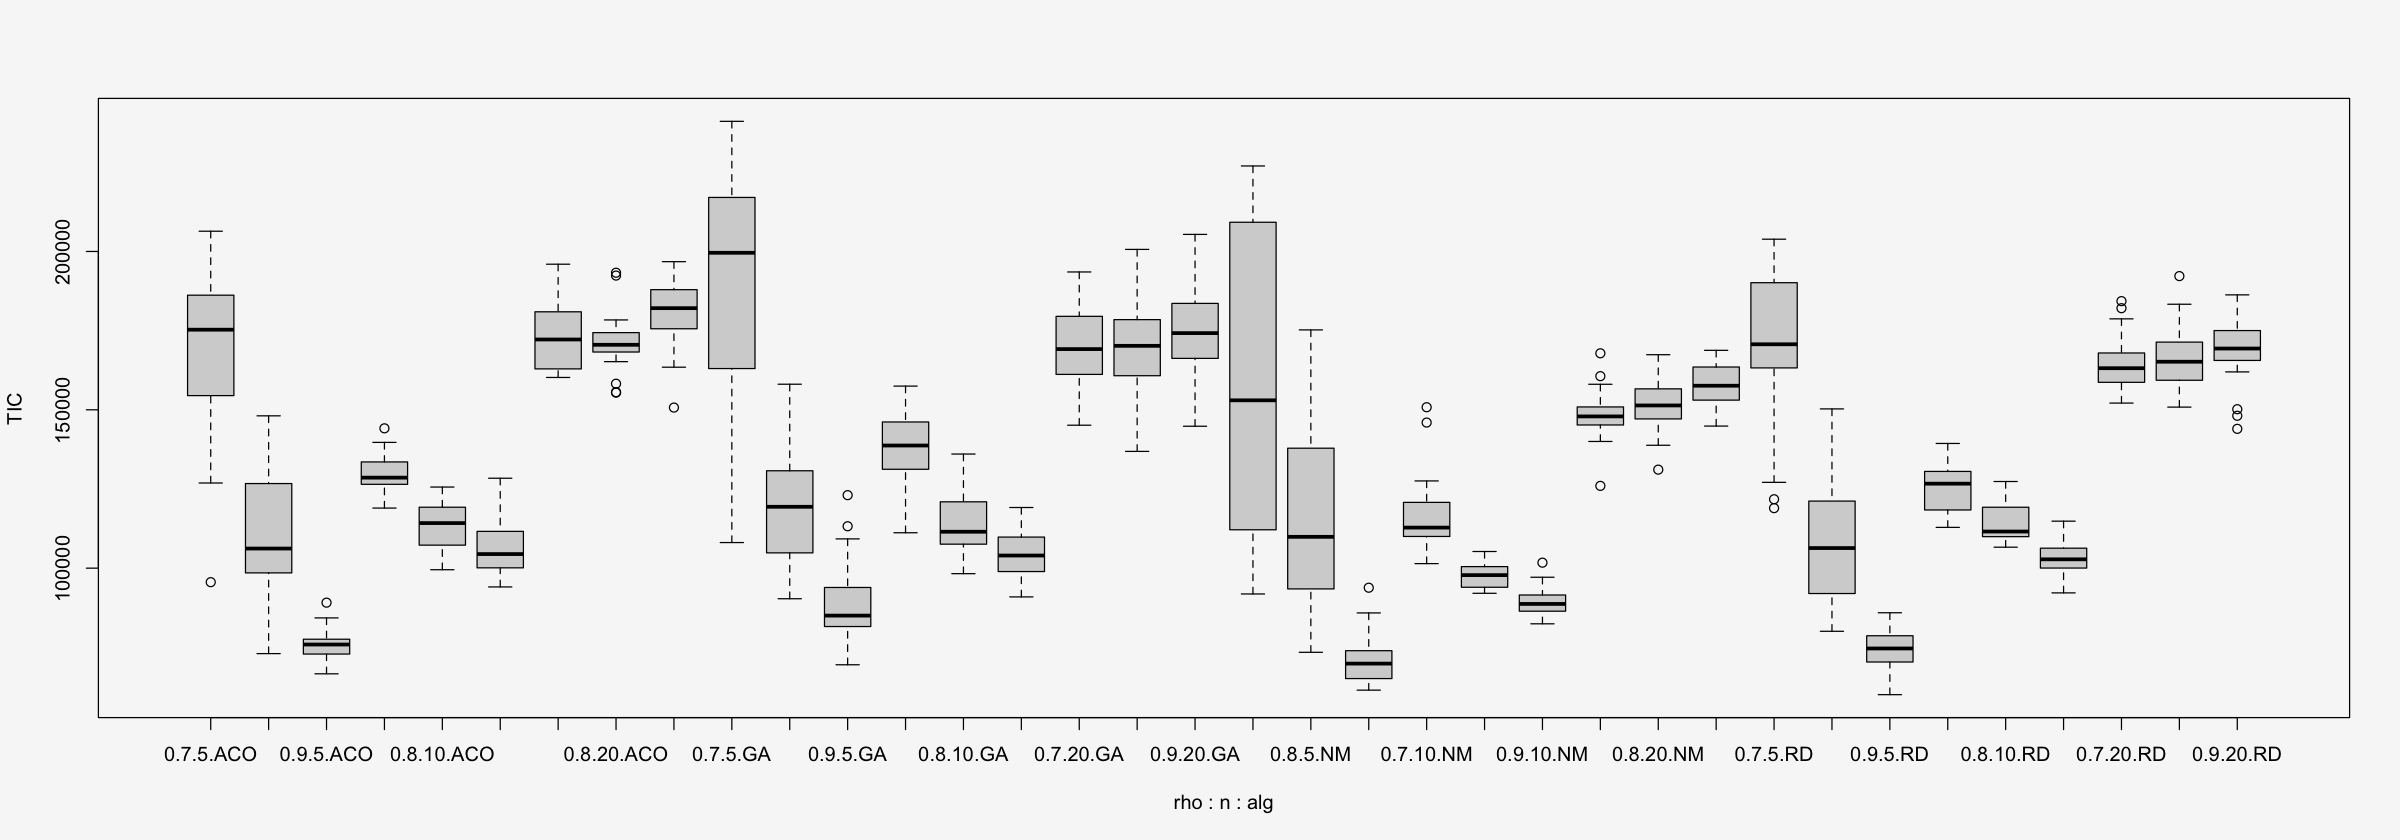

In [83]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~rho*n*alg)

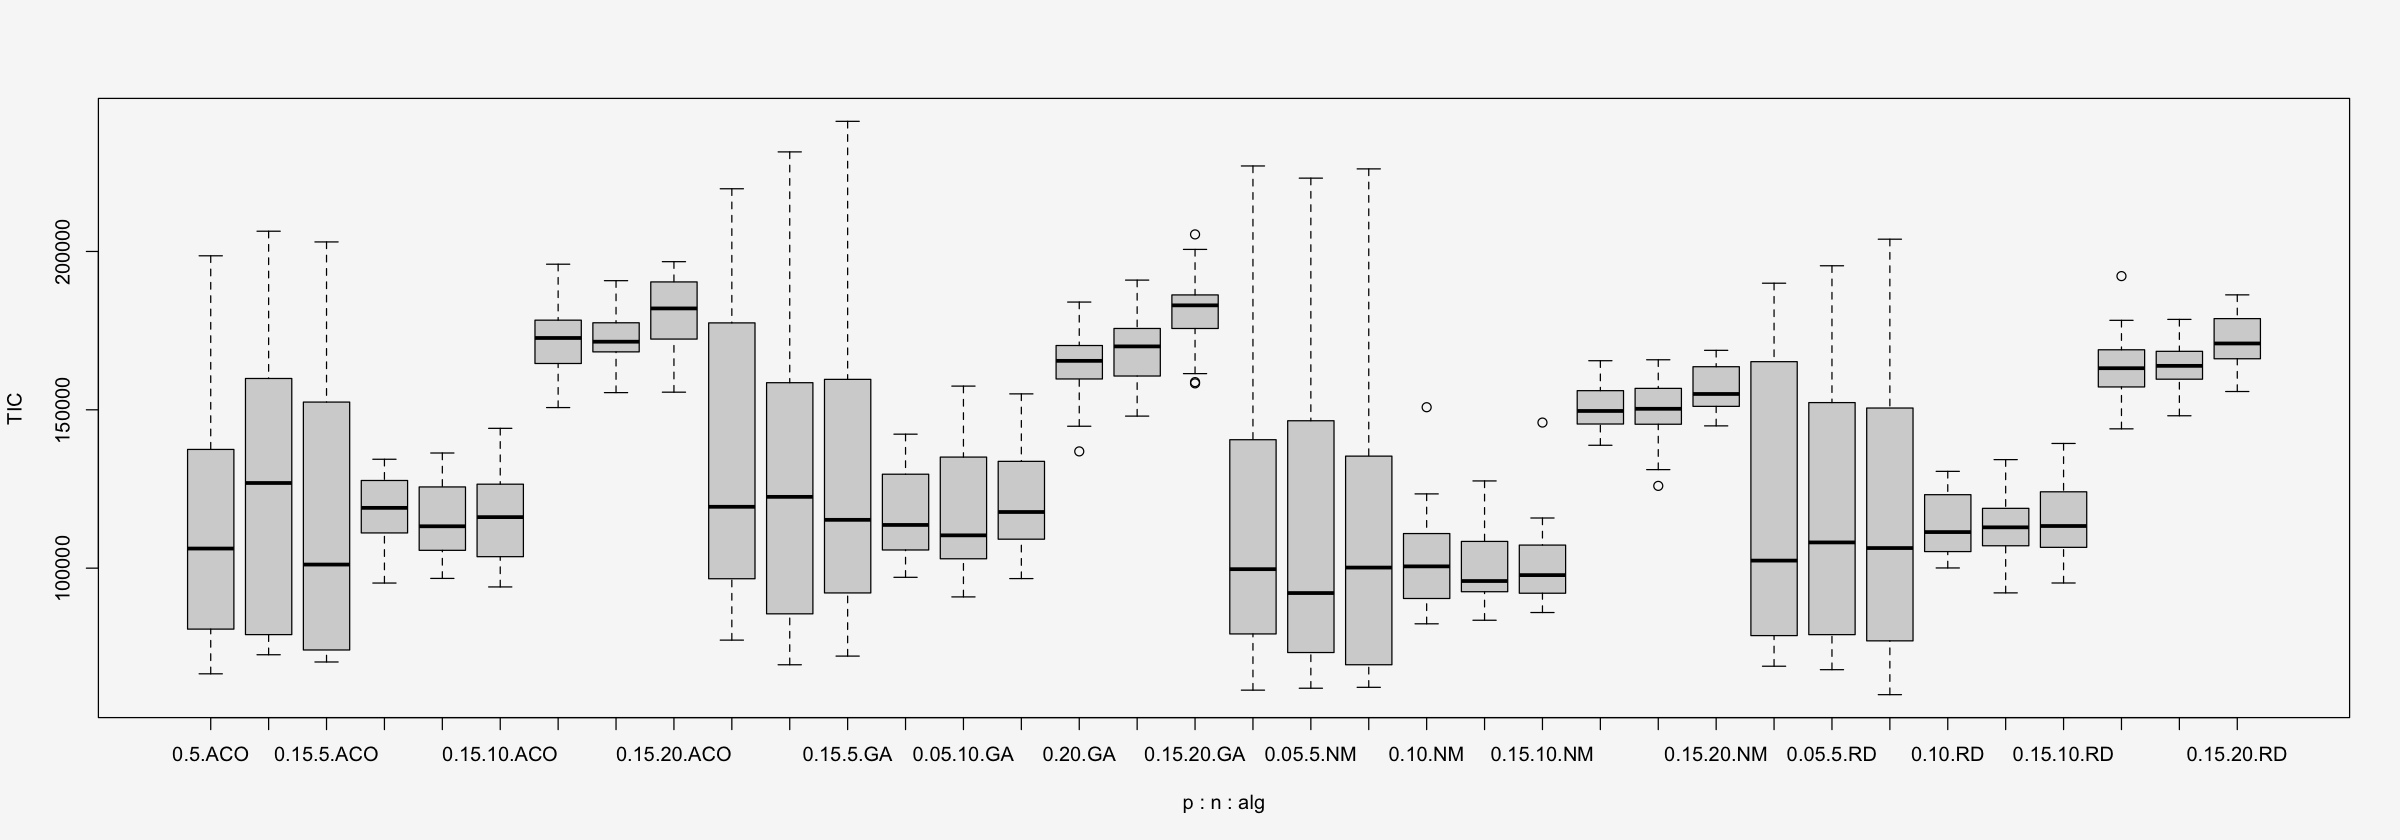

In [84]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~p*n*alg)

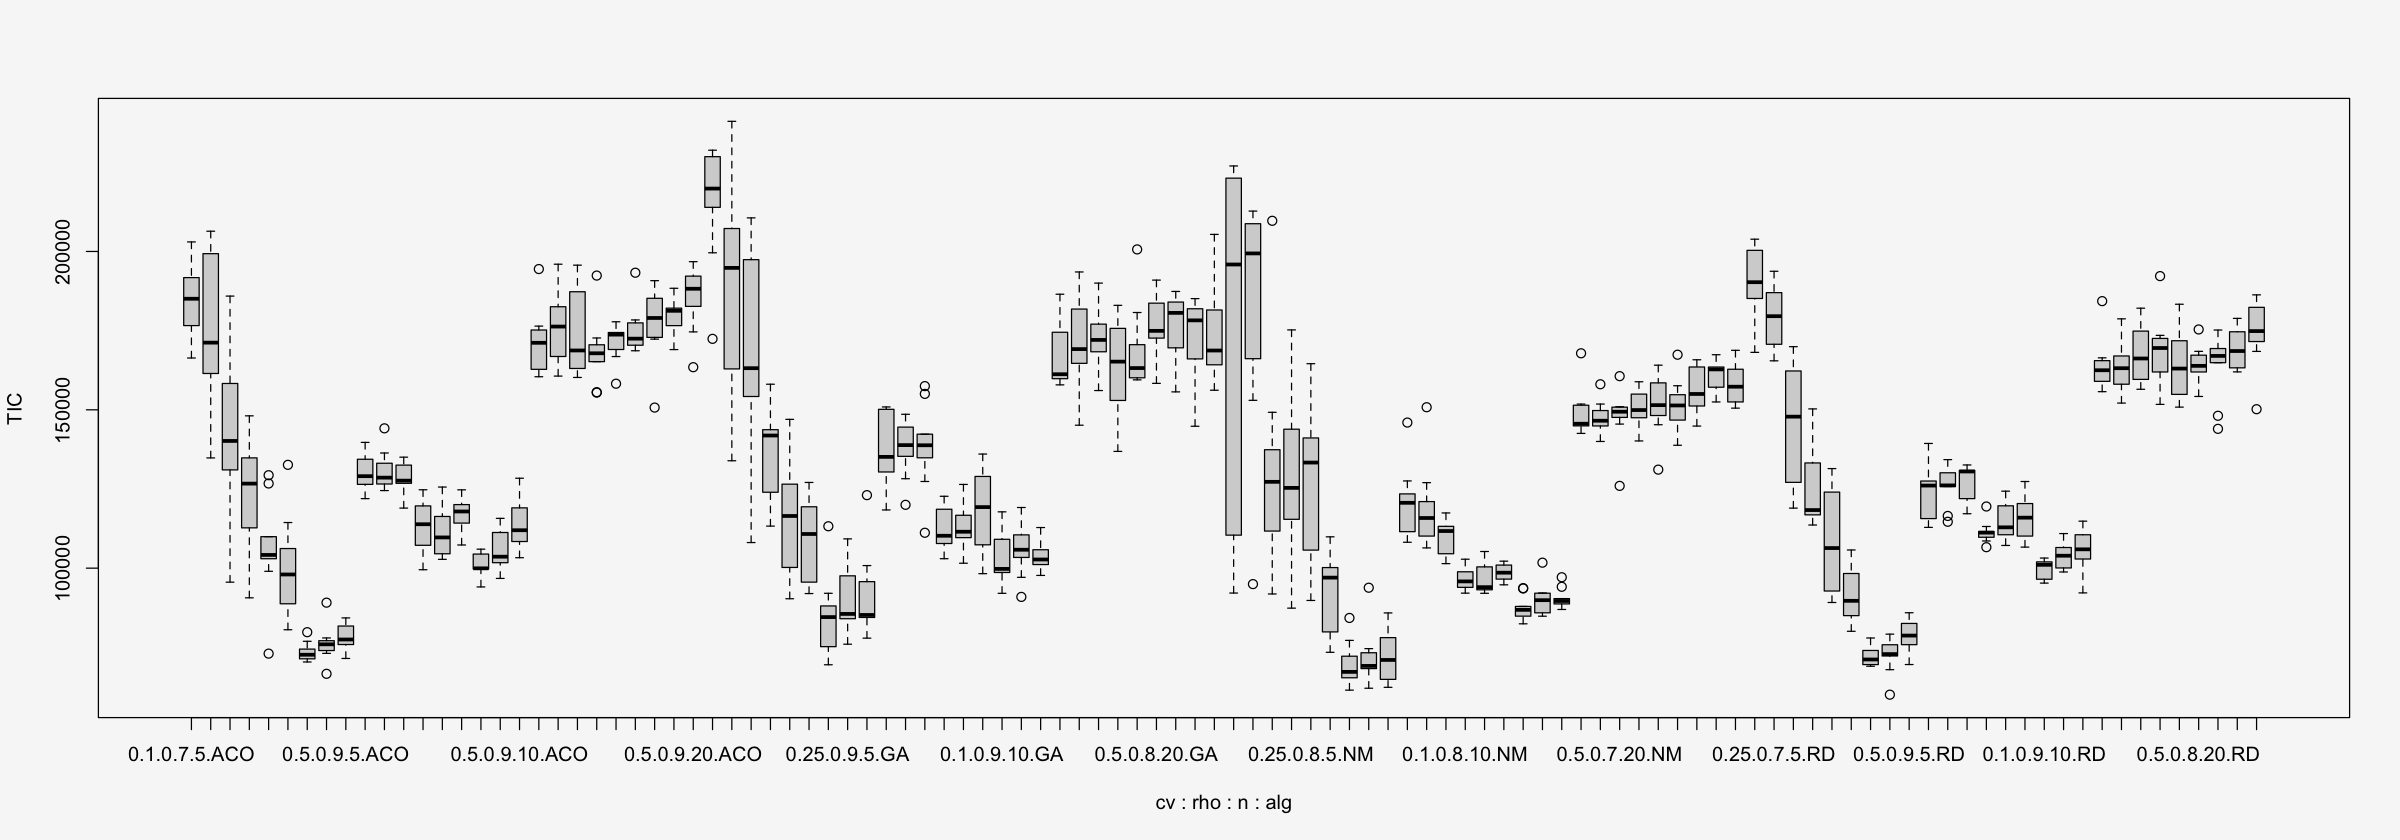

In [85]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv*rho*n*alg)

In [86]:
options(repr.plot.width=7)

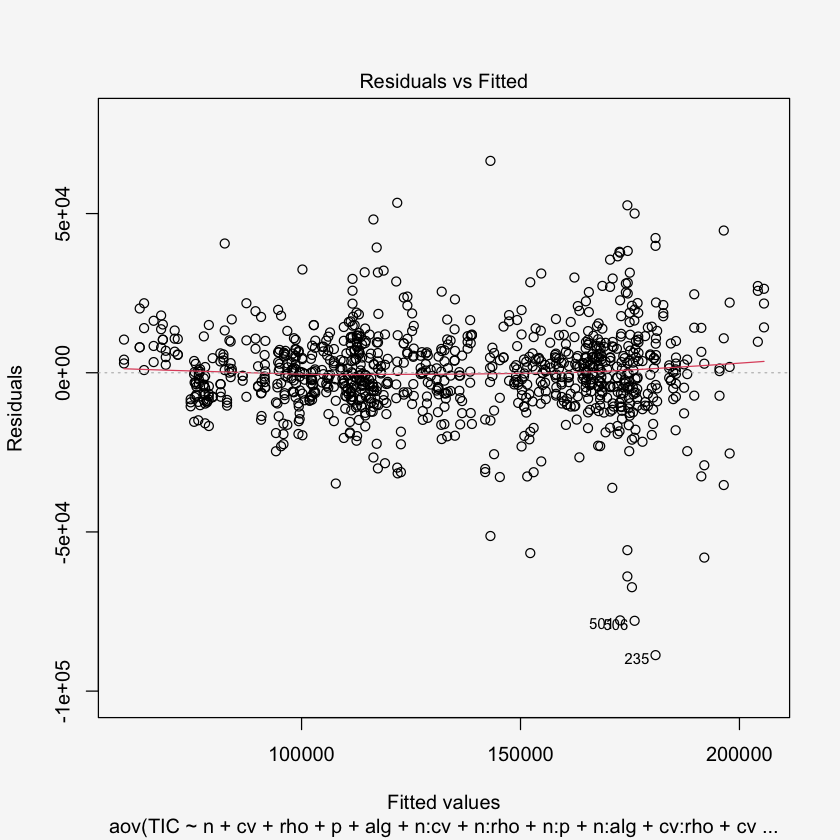

In [87]:
# Light gray background color
par(bg = "#f7f7f7")
plot(av, 1)

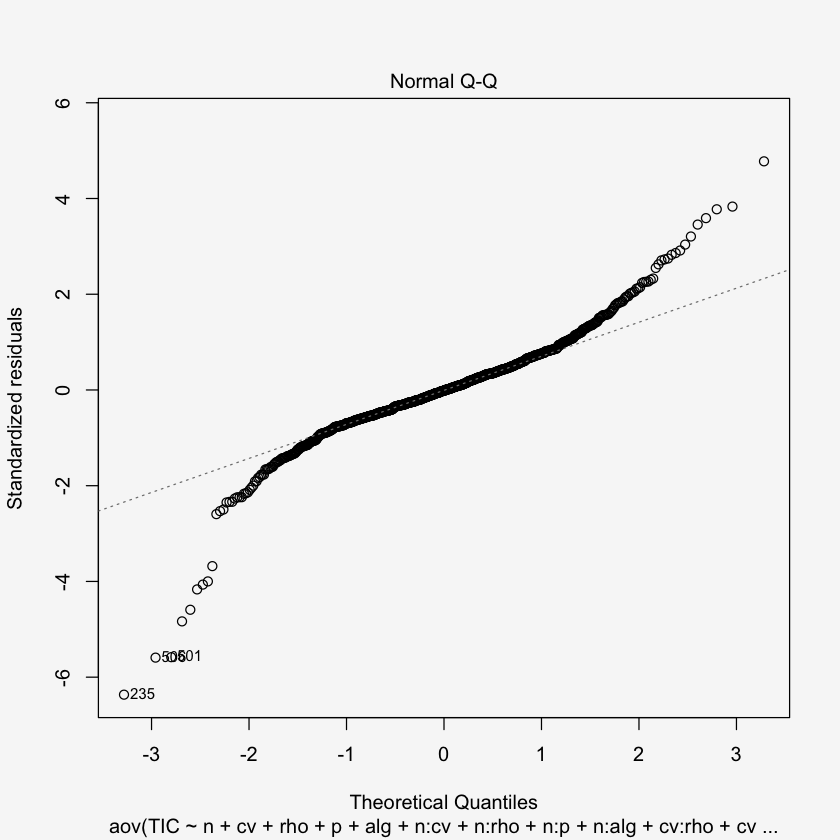

In [88]:
# Light gray background color
par(bg = "#f7f7f7")
plot(av,2)

### Análise apenas para n=5

In [89]:
tab2 <- subset(tab, n==5)
head(tab2)

,OrdemPad,OrdemEns,N,cv,rho,p,algorithm,Cost,SL,Smax,Smin
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,470,1,5,0.25,0.7,0.00,NM,152993.61,89.88,"[397.2654856684437, 575.7171241719723, 535.8452989787397, 1038.5008081180397, 660.4119425659904]","[221.6896732987889, 463.7362156871882, 441.47401004335796, 47.83355313504789, 646.3943394281191]"
7,465,7,5,0.10,0.9,0.15,RD,69559.86,99.35,"[580.8111166873379, 893.6899466541346, 365.2909660399011, 610.2987303625692, 376.2830265383861]","[509.30894571654954, 626.5782904729883, 129.76349794109484, 521.0509227984679, 332.9167157152452]"
14,861,14,5,0.50,0.9,0.15,RD,74637.79,99.27,"[882.2976514491081, 799.3376973098019, 479.1737272290495, 362.67567772722055, 363.16012352361935]","[623.2651786458105, 313.3929404417238, 424.38304517888116, 213.5424710201232, 273.79260189311424]"
19,139,19,5,0.10,0.9,0.05,GA,75214.50,99.73,"[871.29, 719.21, 434.5, 69.51, 87.87]","[680.185542465244, 708.226029428286, 130.73607084022254, 61.62233405837572, 65.7388655395834]"
22,503,22,5,0.25,0.9,0.15,GA,75987.55,99.31,"[8.63, 429.97, 893.82, 897.88, 819.14]","[3.02822497324049, 269.56136278167264, 241.86013529645442, 282.36342746327585, 689.9612958998841]"
24,458,24,5,0.10,0.9,0.00,NM,61480.54,99.04,"[515.0071413878777, 513.4793190766003, 417.31682936938597, 539.1285750918469, 465.5988205213163]","[186.5205170433235, 241.1438696867731, 319.7322107828665, 273.5499686104499, 302.8065976188563]"


In [90]:
TIC<-tab2$Cost
alg<-factor(tab2$algorithm)
cv<-factor(tab2$cv)
rho<-factor(tab2$rho)
p<-factor(tab2$p)

In [91]:
av<-aov(TIC~cv*rho*p*alg)
summary(av)

              Df    Sum Sq   Mean Sq F value   Pr(>F)    
cv             2 2.800e+10 1.400e+10  29.620 4.29e-12 ***
rho            2 5.023e+11 2.512e+11 531.443  < 2e-16 ***
p              2 3.330e+08 1.665e+08   0.352   0.7035    
alg            3 1.636e+10 5.453e+09  11.538 4.80e-07 ***
cv:rho         4 2.395e+10 5.988e+09  12.669 2.80e-09 ***
cv:p           4 2.971e+09 7.428e+08   1.572   0.1829    
rho:p          4 8.855e+08 2.214e+08   0.468   0.7589    
cv:alg         6 4.106e+09 6.844e+08   1.448   0.1976    
rho:alg        6 5.379e+09 8.965e+08   1.897   0.0826 .  
p:alg          6 1.547e+09 2.578e+08   0.546   0.7732    
cv:rho:p       8 3.614e+09 4.518e+08   0.956   0.4715    
cv:rho:alg    12 3.230e+09 2.692e+08   0.570   0.8653    
cv:p:alg      12 3.183e+09 2.653e+08   0.561   0.8715    
rho:p:alg     12 3.450e+09 2.875e+08   0.608   0.8340    
cv:rho:p:alg  24 8.409e+09 3.504e+08   0.741   0.8052    
Residuals    216 1.021e+11 4.726e+08                     
---
Signif. co

In [92]:
options(repr.plot.width=7)

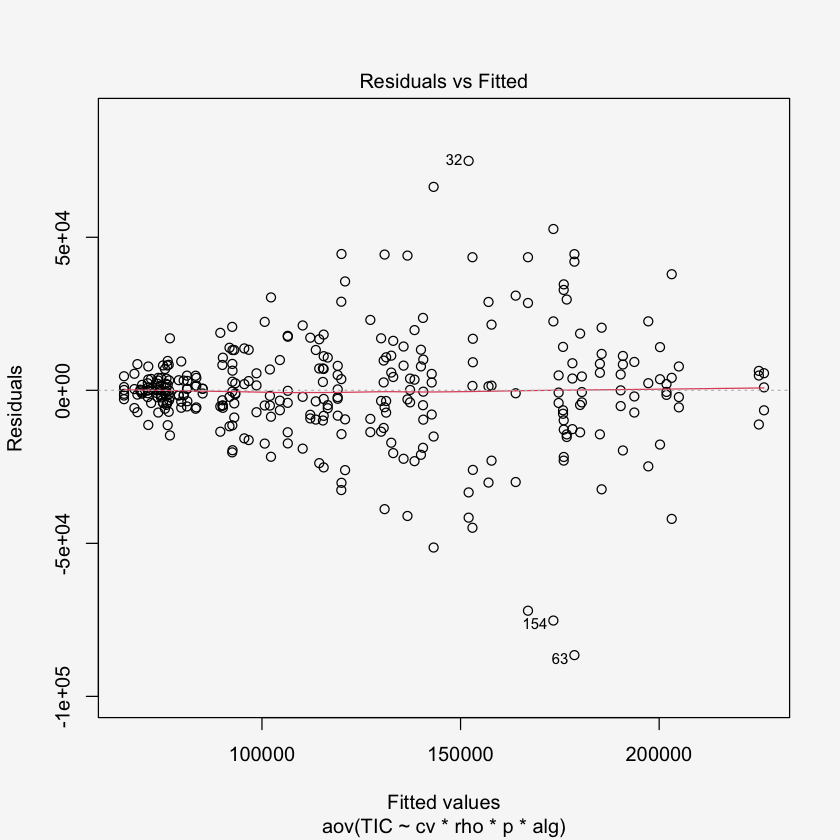

In [95]:
# Light gray background color
par(bg = "#f7f7f7")
plot(av,1)

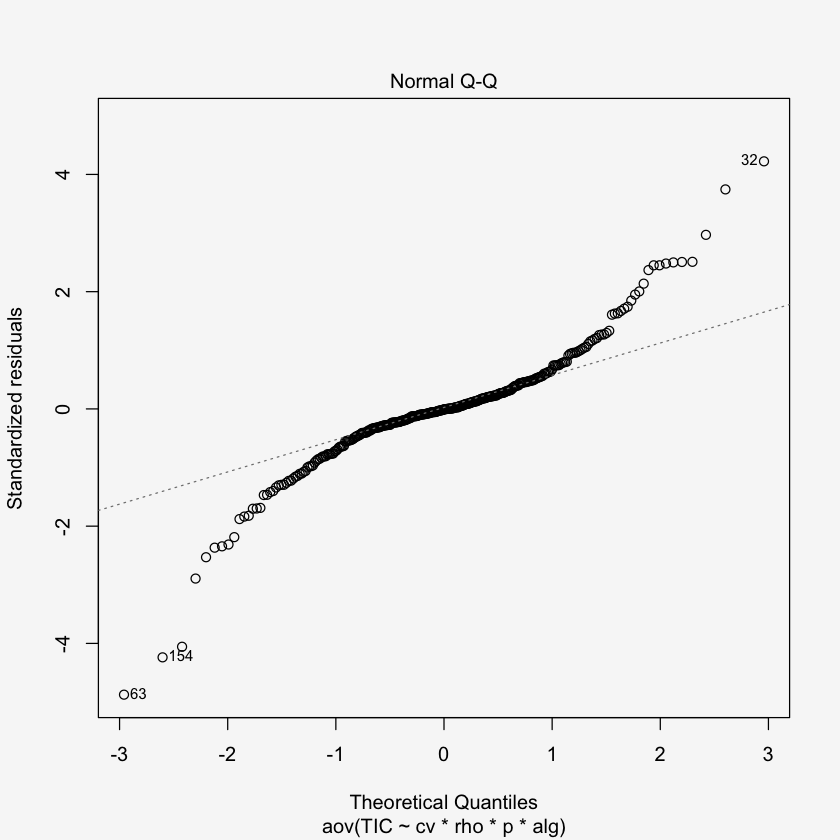

In [96]:
# Light gray background color
par(bg = "#f7f7f7")
plot(av,2)

In [97]:
options(repr.plot.width=10)

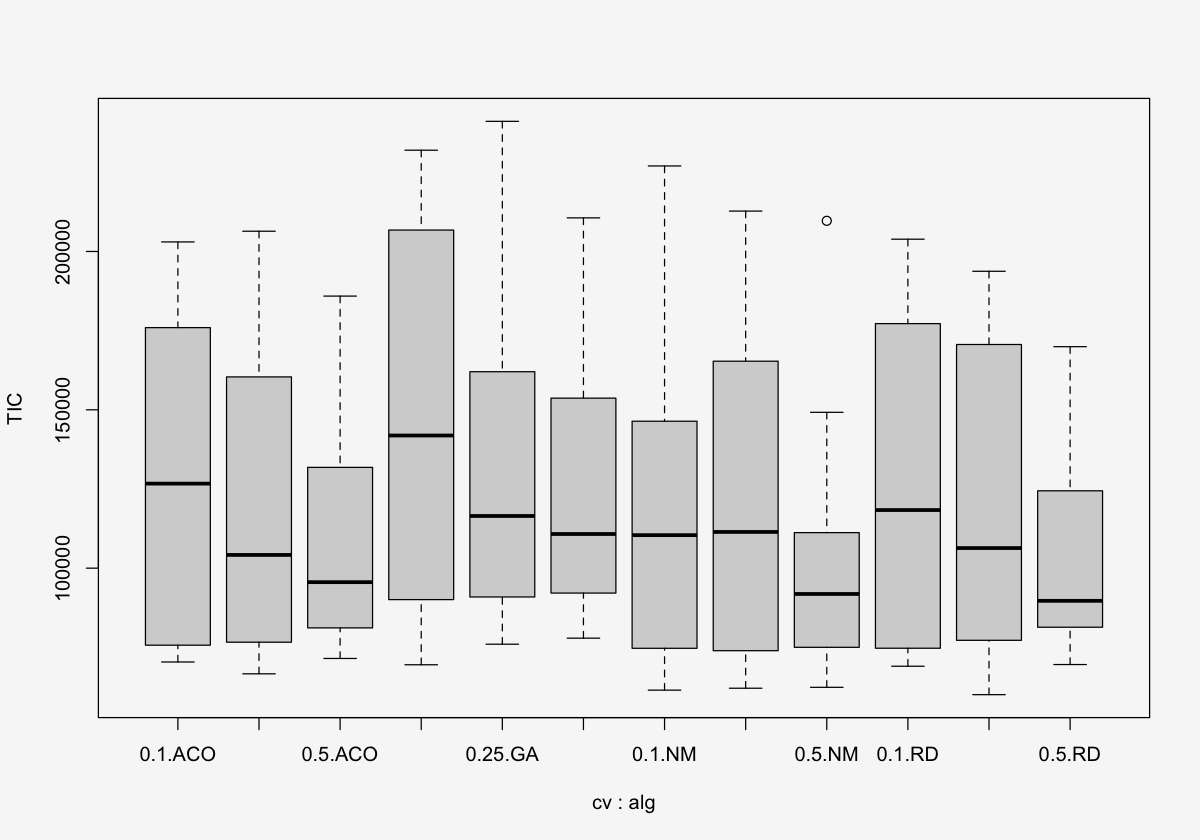

In [98]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv*alg)

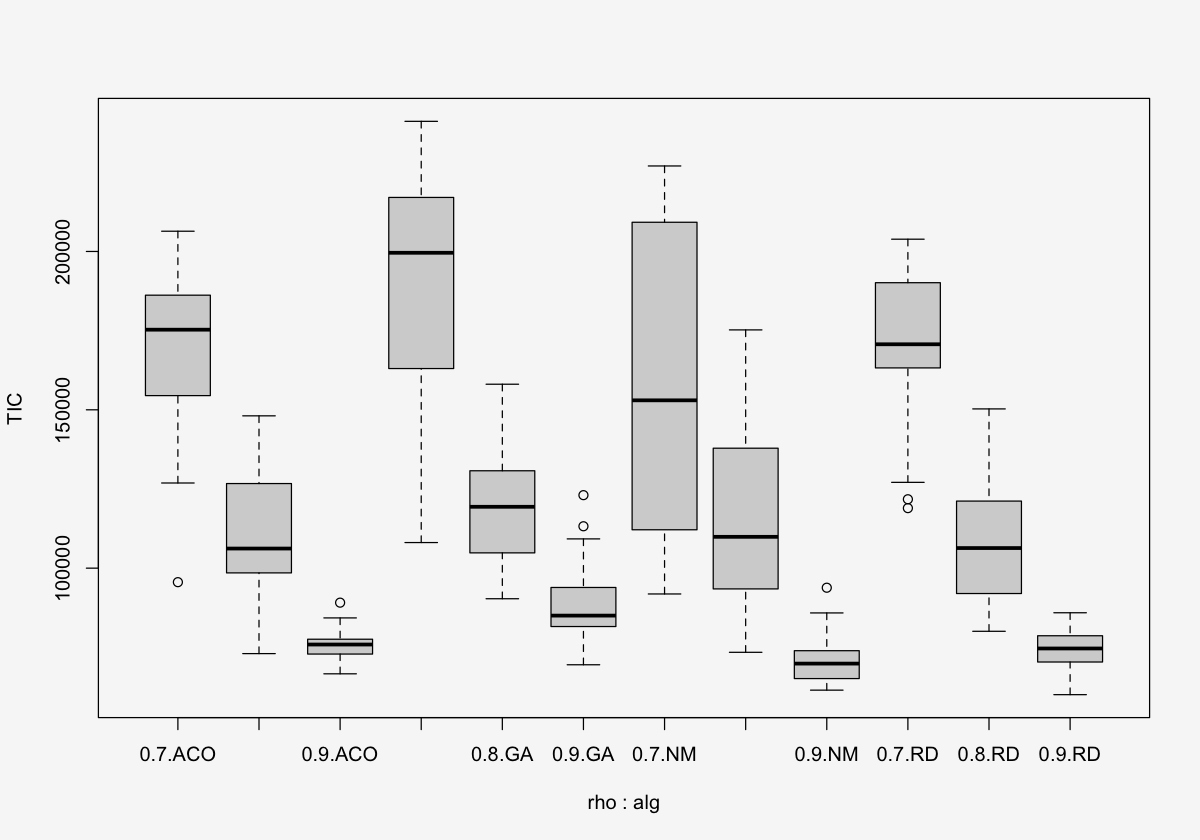

In [99]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~rho*alg)

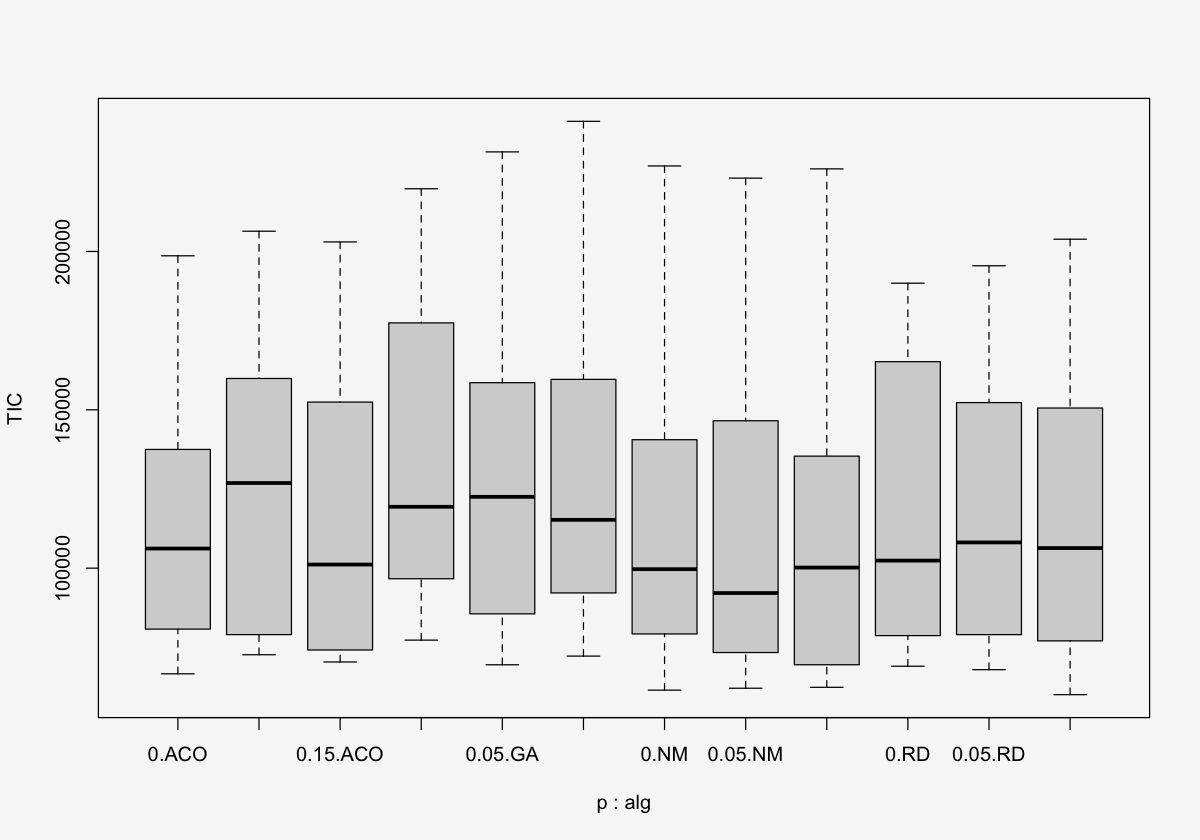

In [100]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~p*alg)

In [101]:
options(repr.plot.width=20)

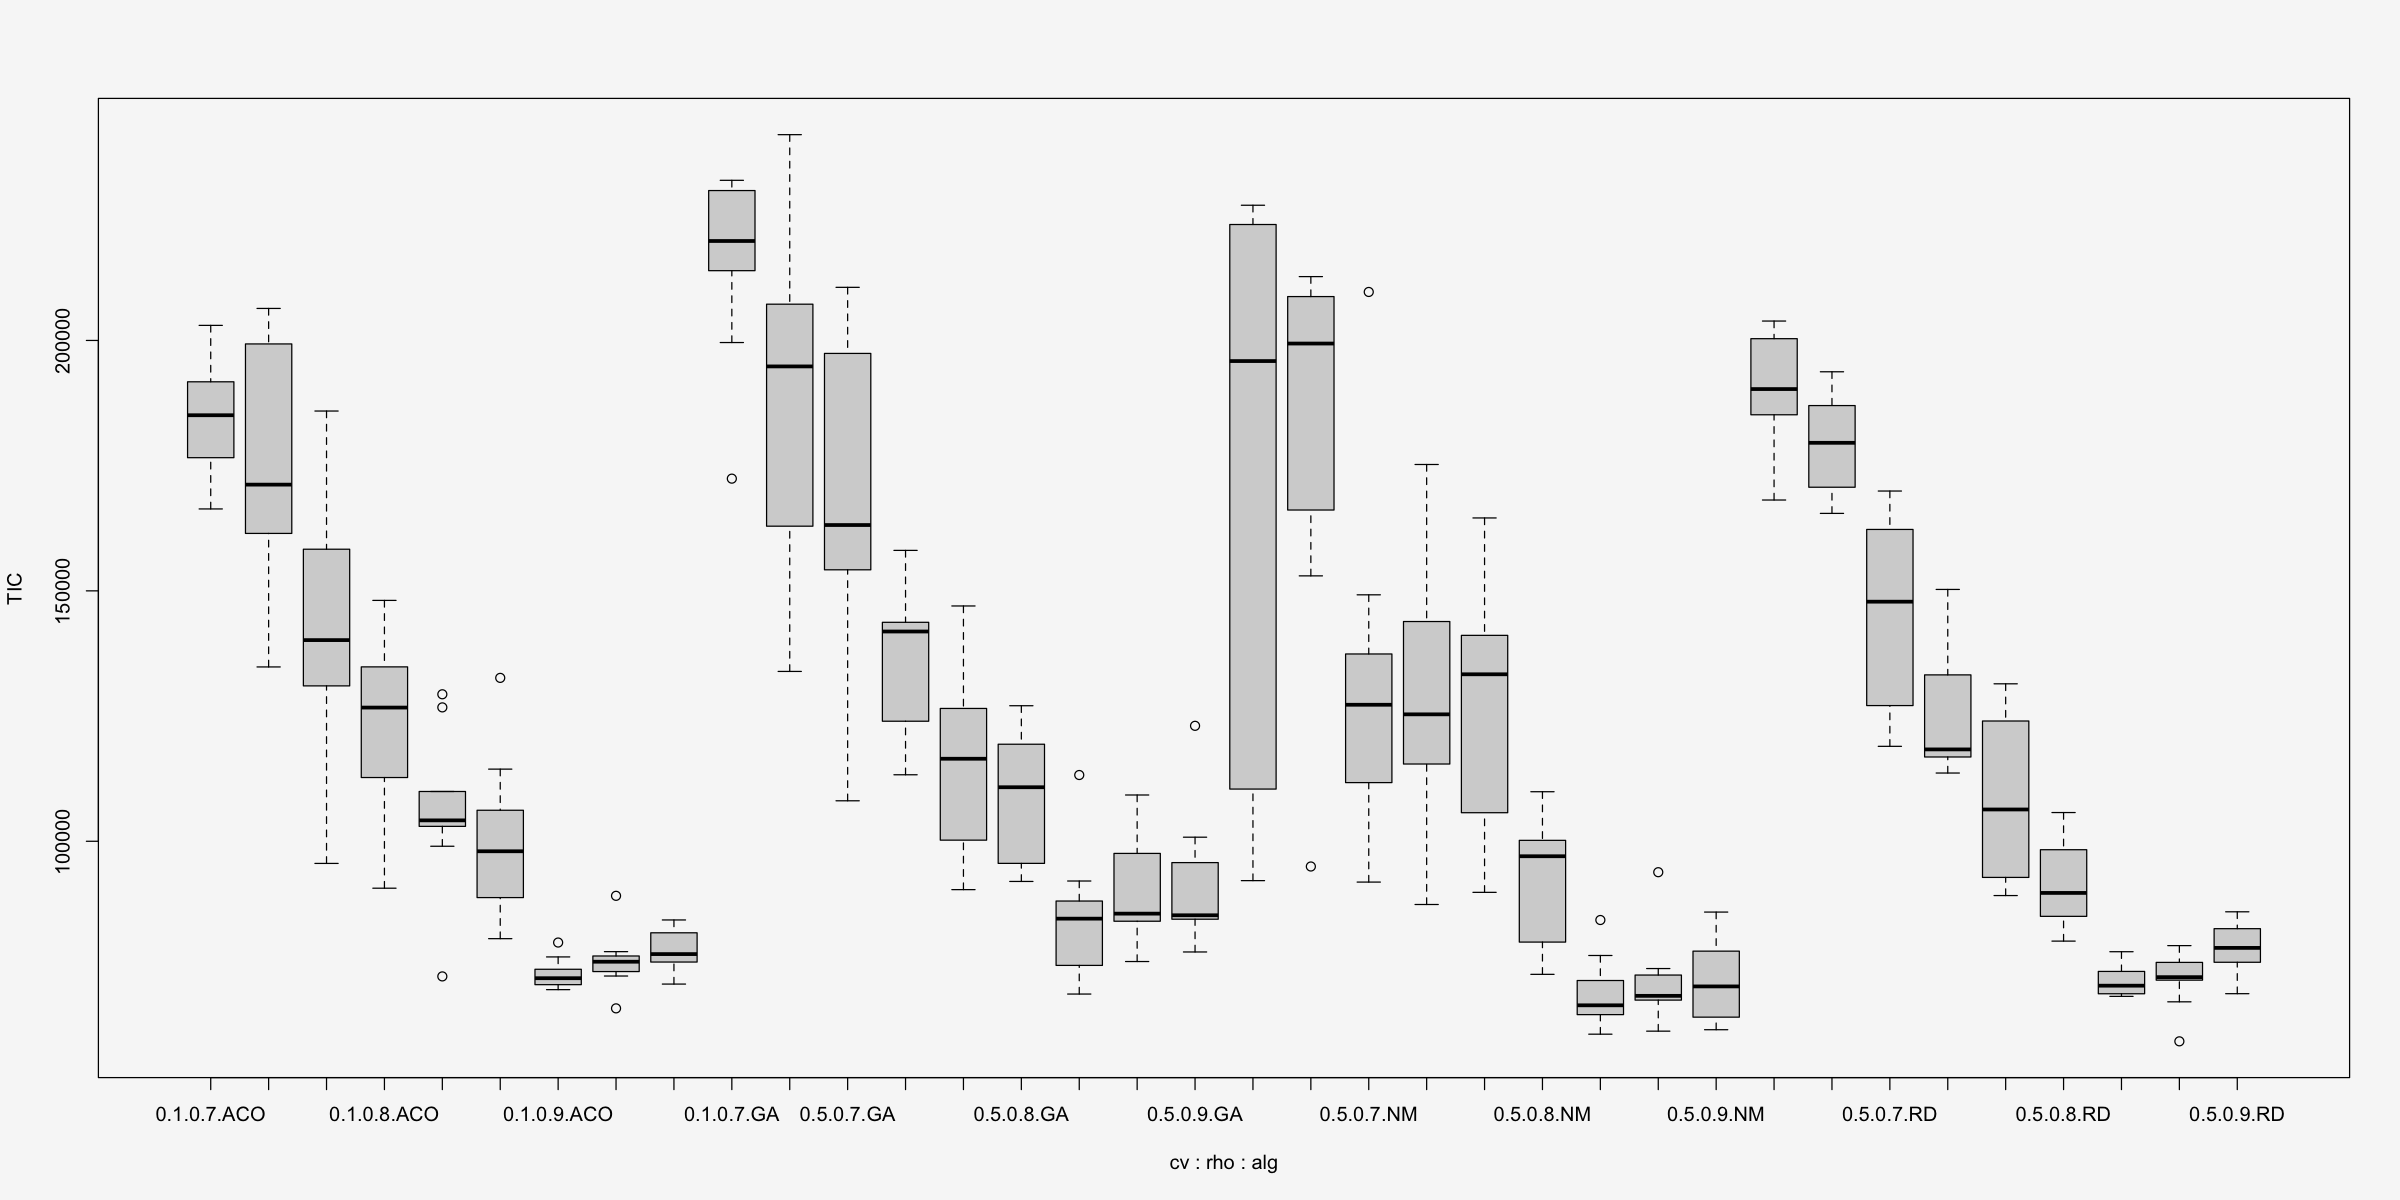

In [104]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv*rho*alg)